In [9]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
_ANDREA = False
if _ANDREA:
    BASE_FOLDER = Path("C:/Users/resca/OneDrive - Politecnico di Milano/_Dottorato/6 - Tesisti/2021_2022_Tasso/_Data")
else:
    BASE_FOLDER = Path("E:\My Drive\_Papers\_2023_Chemosensors\_Data")

In [3]:
compounds = ['BUT', 'CH4', 'CO2']
concentrations = ['75', '131', '130', '303']
sensor_labels = ['S-1', 'S-2', 'S-3','S-4', 'S-5', 'S-6', 'S-7', 'S-8']

In [23]:
df = pd.DataFrame(columns=['Compound', 'Concentration', 'Sensor', 'Data','Time'])
for compound in compounds:
    for conc in concentrations:
        folder = BASE_FOLDER / f'{compound}_{conc}ppm'
        if folder.exists():
            print(f'{compound}-{conc}')
            for csv_file in sorted(folder.iterdir()):
                if csv_file.is_file() and 'csv' in csv_file.name:
                    # Get temperature modulation from file name
                    temperature_m = csv_file.name.split('_')[-1][:-4]
                    # Get start date and time 20230606_100558
                    start_date = csv_file.name[:15]
                    start_date_dt = datetime.datetime.strptime(start_date, "%Y%m%d_%H%M%S")

                    tmp_data = pd.read_csv(csv_file, header=6)
                    tmp_data['Time'] = [start_date_dt+datetime.timedelta(seconds=x*0.1) for x in range(len(tmp_data))]
                    tmp_data = tmp_data[tmp_data.Stage == 'Cleaning']
                    tmp_data_melt = tmp_data.melt(id_vars=['Time'], value_vars=['S-1','S-2','S-3','S-4','S-5','S-6','S-7','S-8'], var_name='Sensor', value_name='Data')
                    tmp_data_melt['Concentration'] = conc
                    tmp_data_melt['Compound'] = compound
                    tmp_data_melt['Data'] = (5 / tmp_data_melt['Data']) * 10000 - 10000

                    df = pd.concat([df, tmp_data_melt], ignore_index=True)
                   

BUT-75
BUT-131
BUT-303
CH4-75
CH4-130
CH4-303
CO2-75
CO2-130
CO2-303


In [24]:
df.head()

,Compound,Concentration,Sensor,Data,Time
0,BUT,75,S-1,1083.000744,2023-06-06 10:05:58.000
1,BUT,75,S-1,1082.625900,2023-06-06 10:05:58.100
2,BUT,75,S-1,1084.125427,2023-06-06 10:05:58.200
3,BUT,75,S-1,1082.813319,2023-06-06 10:05:58.300
4,BUT,75,S-1,1081.314148,2023-06-06 10:05:58.400


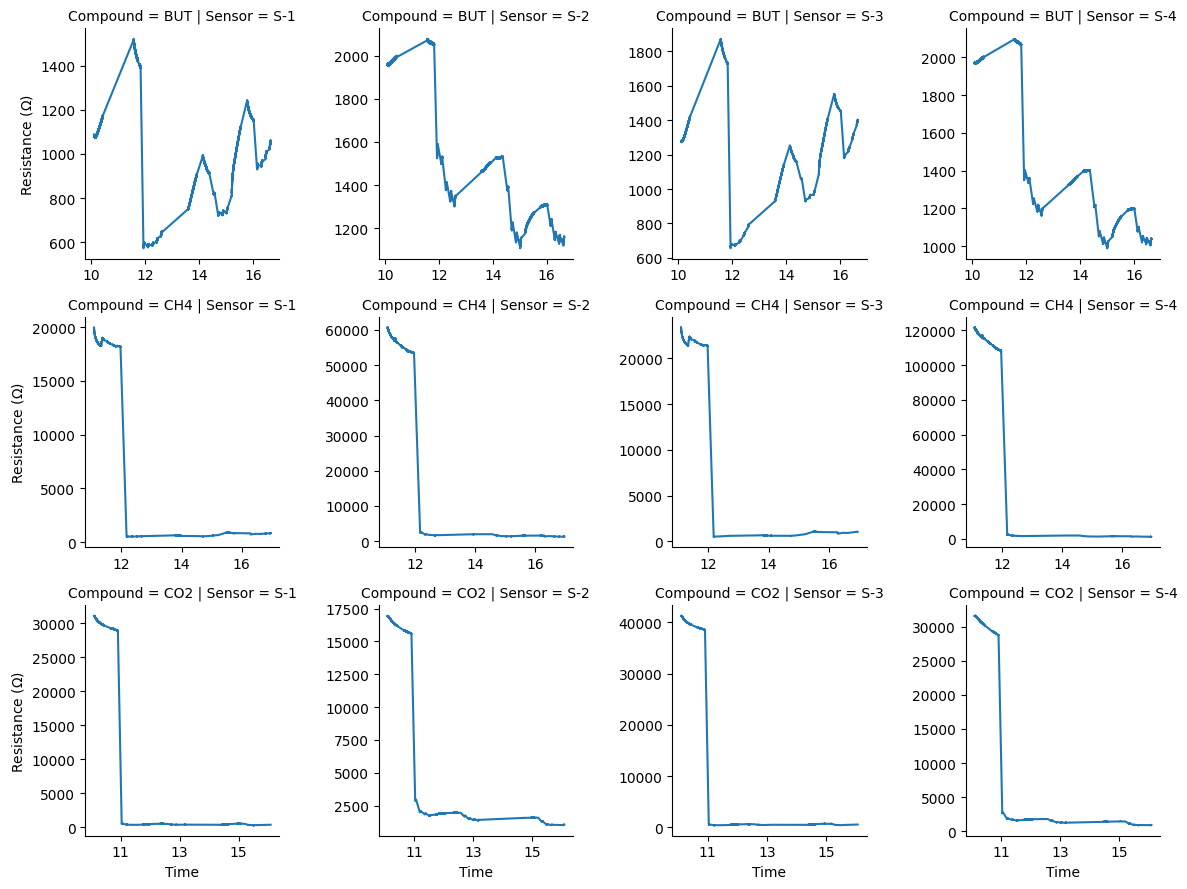

In [31]:
hours = mdates.HourLocator(interval = 1)
h_fmt = mdates.DateFormatter('%H')

g = sns.FacetGrid(data=df[df.Sensor.isin(['S-1','S-2','S-3','S-4'])], row='Compound', col='Sensor', sharex=False, sharey=False)
g.map(sns.lineplot, 'Time', 'Data')
g.set_ylabels('Resistance ($\Omega$)')
for ax in g.axes.flat:
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
    # set formatter
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))

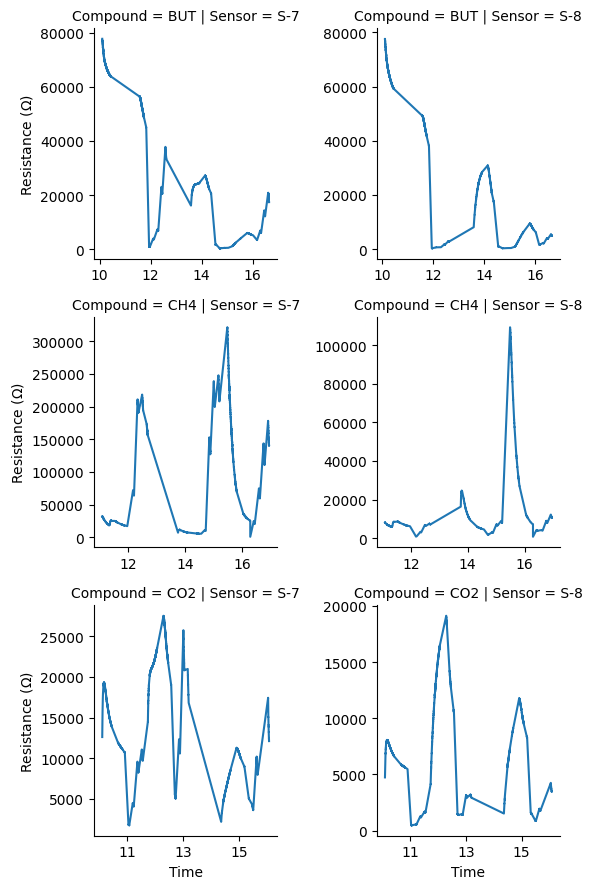

In [33]:
hours = mdates.HourLocator(interval = 1)
h_fmt = mdates.DateFormatter('%H')

g = sns.FacetGrid(data=df[df.Sensor.isin(['S-7','S-8'])], row='Compound', col='Sensor', sharex=False, sharey=False)
g.map(sns.lineplot, 'Time', 'Data')
g.set_ylabels('Resistance ($\Omega$)')
for ax in g.axes.flat:
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
    # set formatter
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))